In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
colors= ['royalblue', 'red','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer= np.vectorize(lambda x: colors[x % len(colors)])

In [4]:
from sklearn.datasets import make_classification
X, y= make_classification(n_classes= 2, class_sep= 0.5, weights= [0.05, 0.95], n_informative= 2, n_redundant= 0, flip_y= 0, n_features=2, n_clusters_per_class=1 ,n_samples= 1000, random_state= 10)

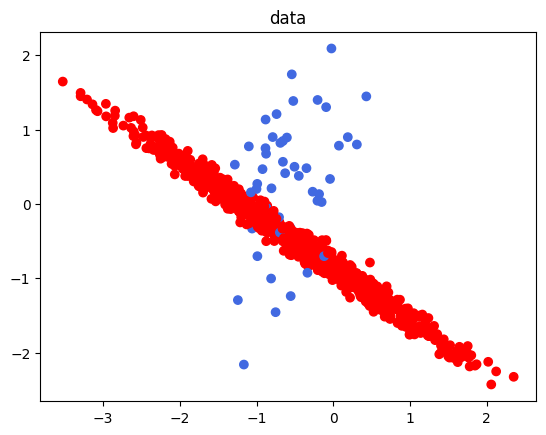

In [5]:
plt.gca().set_title('data')
plt.scatter(X[:,0], X[:,1],c= vectorizer(y))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.3, random_state= 0)

In [7]:
np.bincount(y_train)

array([ 31, 669])

In [8]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression(random_state= 0)
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('Classification Report:')
print(classification_report(y_test,y_pred))

Confusion Matrix:
[[  4  15]
 [  0 281]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.21      0.35        19
           1       0.95      1.00      0.97       281

    accuracy                           0.95       300
   macro avg       0.97      0.61      0.66       300
weighted avg       0.95      0.95      0.93       300



In [13]:
from imblearn.over_sampling import SMOTE
sm= SMOTE(random_state= 42)
X_res, y_res= sm.fit_resample(X_train,y_train)

In [15]:
np.bincount(y_res)

array([669, 669])

In [18]:
from sklearn.metrics import classification_report
clf1= LogisticRegression(random_state= 0)
clf1.fit(X_res,y_res)
y_pred= clf1.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('Classification Report:')
print(classification_report(y_test,y_pred))

Confusion Matrix:
[[ 16   3]
 [ 40 241]]
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.84      0.43        19
           1       0.99      0.86      0.92       281

    accuracy                           0.86       300
   macro avg       0.64      0.85      0.67       300
weighted avg       0.94      0.86      0.89       300

